# An explore of the data_cube
-Kaiying Sun

Simple notebook to explore the variables present in the 2 data_cube

## First, we read the data_cube in, and convert it to a Pandas Dataframe.

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

%matplotlib inline

pd.set_option('display.max_columns', 120)

Please note that, in this competition HDF5 file is being used instead of csv.

In [70]:
test_mat = sio.loadmat('data_cube.mat')

test_mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jun 05 15:58:20 2017',
 '__version__': '1.0',
 'data_cube': array([[  1.00000000e+00,   7.56000000e+02,   1.10065622e+01, ...,
          -2.04023570e-02,   4.53999996e-01,   7.98093081e-02],
        [  2.00000000e+00,   7.56000000e+02,   3.27800140e+01, ...,
          -1.25505999e-02,   7.72000015e-01,   2.19225883e-02],
        [  3.00000000e+00,   7.56000000e+02,   1.74870853e+01, ...,
                      nan,              nan,   4.83509302e-02],
        ..., 
        [  3.42000000e+03,   2.51700000e+03,   4.04642944e+01, ...,
           2.27953587e-03,   5.03000021e-01,   2.66433954e-02],
        [  3.42400000e+03,   2.51700000e+03,   6.98021088e+01, ...,
          -2.06831191e-03,   1.99000001e-01,   9.49120522e-03],
        [  3.42500000e+03,   2.51700000e+03,   3.62000008e+01, ...,
           3.38007603e-03,   2.87999988e-01,  -1.26618147e-02]], dtype=float32)}

In [71]:
type(test_mat)

dict

In [72]:
train_mat = test_mat['data_cube']
train_mat

array([[  1.00000000e+00,   7.56000000e+02,   1.10065622e+01, ...,
         -2.04023570e-02,   4.53999996e-01,   7.98093081e-02],
       [  2.00000000e+00,   7.56000000e+02,   3.27800140e+01, ...,
         -1.25505999e-02,   7.72000015e-01,   2.19225883e-02],
       [  3.00000000e+00,   7.56000000e+02,   1.74870853e+01, ...,
                     nan,              nan,   4.83509302e-02],
       ..., 
       [  3.42000000e+03,   2.51700000e+03,   4.04642944e+01, ...,
          2.27953587e-03,   5.03000021e-01,   2.66433954e-02],
       [  3.42400000e+03,   2.51700000e+03,   6.98021088e+01, ...,
         -2.06831191e-03,   1.99000001e-01,   9.49120522e-03],
       [  3.42500000e+03,   2.51700000e+03,   3.62000008e+01, ...,
          3.38007603e-03,   2.87999988e-01,  -1.26618147e-02]], dtype=float32)

In [73]:
len (train_mat)

3010475

In [74]:
type(train_mat)

numpy.ndarray

In [75]:
train_mat.shape

(3010475, 13)

In [76]:
columns = ['si', 'date_idx', 'close', 'high', 'low', 'open', 'vwap', 'volume', 'spread_timeweighted_allday', 'mktcap', 'ret1_excess', 'volatility_15min_ret_allday', 'ret1']

df = pd.DataFrame(train_mat, columns=columns)

## **Sneak-peek at the data:**

Let us look at the top few rows to understand the variables and the nature of data

In [78]:
df.head()

,si,date_idx,close,high,low,open,vwap,volume,spread_timeweighted_allday,mktcap,ret1_excess,volatility_15min_ret_allday,ret1
0,1.0,756.0,11.006562,11.047226,10.511810,10.572809,10.880027,3030120.0,NaN,NaN,-0.020402,0.454,0.079809
1,2.0,756.0,32.780014,33.674004,30.723312,30.751602,32.732647,10221556.0,NaN,NaN,-0.012551,0.772,0.021923
2,3.0,756.0,17.487085,17.584661,16.873035,17.460470,17.372072,782126.0,NaN,NaN,NaN,NaN,0.048351
3,4.0,756.0,33.283447,33.439529,32.240154,33.010765,33.115074,795895.0,NaN,NaN,-0.002315,0.489,0.001484
4,5.0,756.0,11.709191,11.746611,10.987931,11.080832,11.475926,188749408.0,NaN,NaN,0.030369,0.397,-0.016494


In [79]:
df.describe()

,si,date_idx,close,high,low,open,vwap,volume,spread_timeweighted_allday,mktcap,ret1_excess,volatility_15min_ret_allday,ret1
count,3.010475e+06,3.010475e+06,3.010475e+06,3.010469e+06,3.010469e+06,3.010469e+06,3.010475e+06,3.010475e+06,2.273596e+06,1.929689e+06,2.999284e+06,2.863102e+06,3.010475e+06
mean,1.445190e+03,1.690843e+03,3.232310e+02,3.330381e+02,3.150025e+02,3.253507e+02,3.236931e+02,2.706195e+06,2.095209e-01,1.483166e+04,5.212351e-05,3.289632e-01,5.566553e-04
std,8.604835e+02,5.062070e+02,2.463242e+04,2.553734e+04,2.386583e+04,2.482407e+04,2.467722e+04,8.301915e+06,2.232117e+01,3.623123e+04,1.973788e-02,1.703116e-01,2.548401e-02
min,1.000000e+00,7.560000e+02,3.899967e-01,3.974344e-01,3.102415e-01,3.899967e-01,3.898544e-01,7.143272e+00,2.882472e-04,5.910000e+00,-8.007384e-01,1.000000e-03,-9.276018e-01
25%,7.060000e+02,1.250000e+03,1.730000e+01,1.758000e+01,1.701708e+01,1.730000e+01,1.729582e+01,4.031140e+05,1.122283e-02,1.671700e+03,-7.954499e-03,2.110000e-01,-1.035014e-02
50%,1.429000e+03,1.692000e+03,2.918144e+01,2.957000e+01,2.877000e+01,2.918000e+01,2.917083e+01,9.432340e+05,2.103505e-02,3.727760e+03,-1.925959e-04,2.870000e-01,4.340410e-04
75%,2.136000e+03,2.124000e+03,4.699000e+01,4.754515e+01,4.640844e+01,4.698616e+01,4.697791e+01,2.424215e+06,4.489344e-02,1.104598e+04,7.676261e-03,4.030000e-01,1.126528e-02
max,3.425000e+03,2.517000e+03,5.272068e+06,5.516721e+06,5.132280e+06,5.335402e+06,5.313755e+06,1.226790e+09,3.197740e+03,7.746915e+05,2.751757e+00,5.571000e+00,2.954430e+00


In [82]:
df.shape

(3010475, 13)

Now count the number of missing values in each of the columns.

In [83]:
labels = []
values = []
for col in df.columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
    print(col, values[-1])

si 0
date_idx 0
close 0
high 6
low 6
open 6
vwap 0
volume 0
spread_timeweighted_allday 736879
mktcap 1080786
ret1_excess 11191
volatility_15min_ret_allday 147373
ret1 0


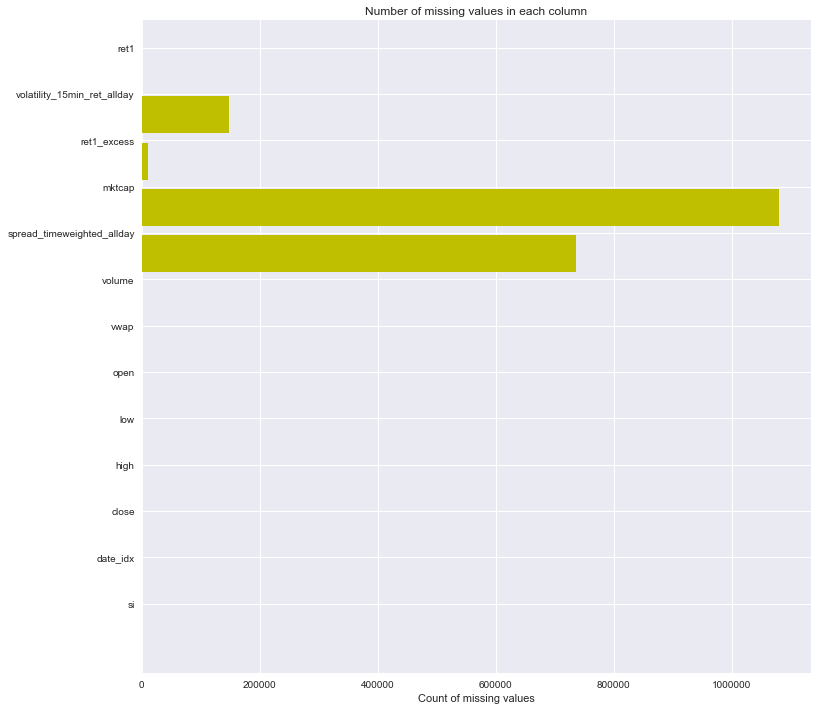

In [84]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#autolabel(rects)
plt.show()

## Distribution plot:

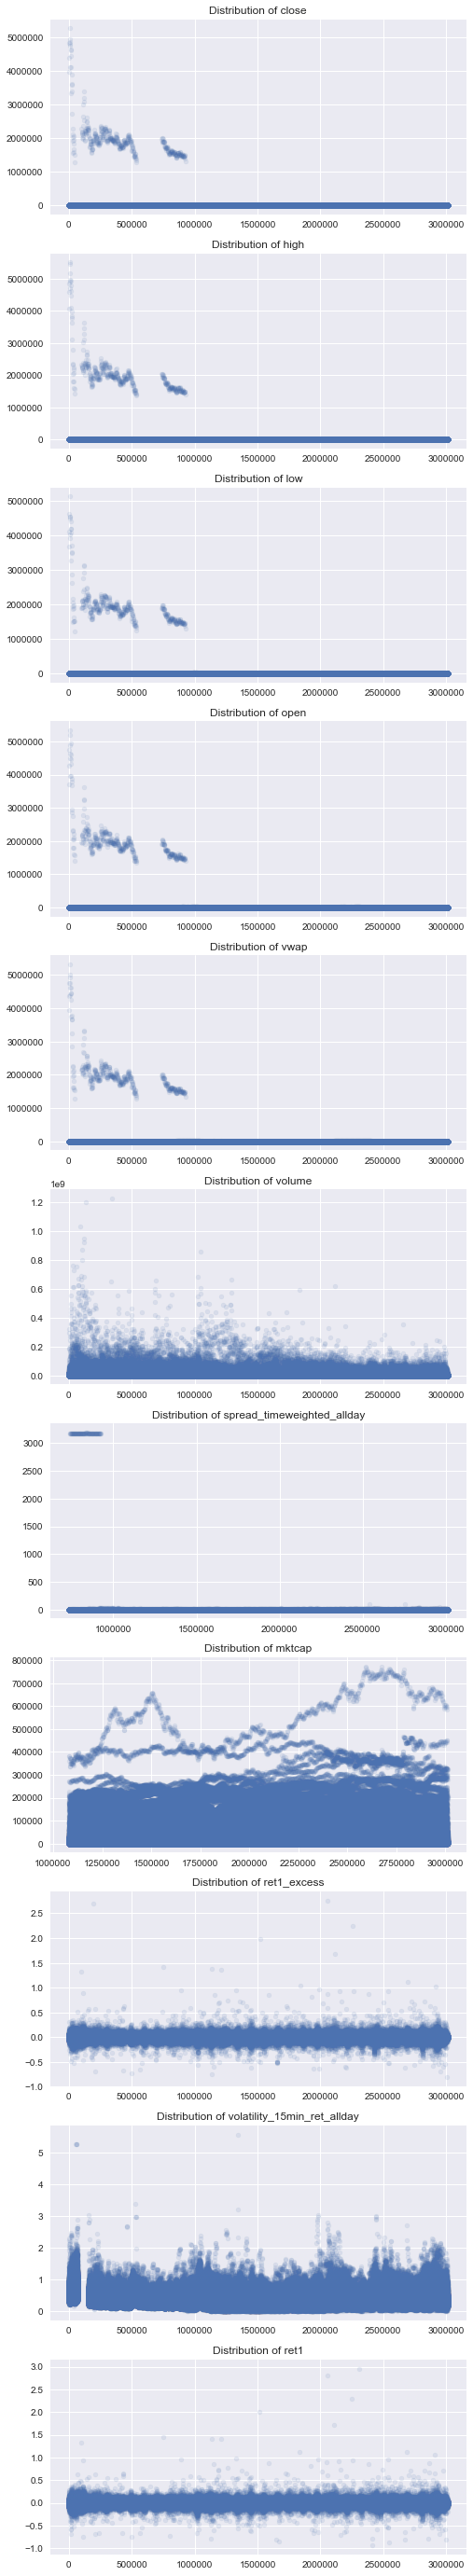

In [86]:
cols_to_use =  ['close', 'high', 'low', 'open', 'vwap', 'volume', 'spread_timeweighted_allday', 'mktcap', 'ret1_excess', 'volatility_15min_ret_allday', 'ret1']

fig = plt.figure(figsize=(8, 50))
plot_count = 0
for col in cols_to_use:
    plot_count += 1
    plt.subplot(11, 1, plot_count)
    plt.scatter(range(df.shape[0]), df[col].values, s=25, alpha=0.11)
    plt.title("Distribution of "+col)
plt.show()

## Distribution of y

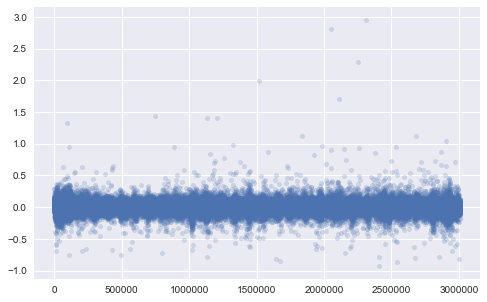

In [88]:
plt.figure(figsize=(8, 5))
plt.scatter(range(df.shape[0]), df.ret1.values, s=20, alpha=0.2)
plt.show()

In [90]:
market_df = df[['date_idx', 'ret1']].groupby('date_idx').agg([np.mean, np.std, len]).reset_index()
market_df.head()

date_idx      ret1                  
                mean       std     len
0    756.0  0.019705  0.039408  1462.0
1    757.0 -0.035642  0.033396  1463.0
2    758.0  0.009246  0.031961  1466.0
3    759.0 -0.027679  0.029650  1464.0
4    760.0 -0.031869  0.034762  1464.0

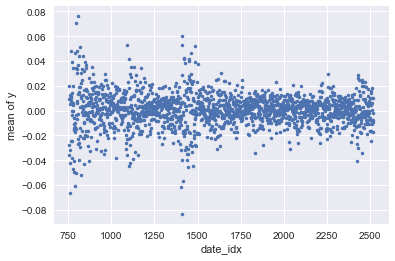

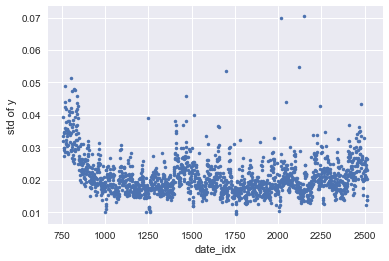

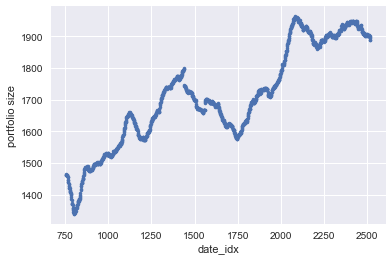

In [91]:
t      = market_df['date_idx']
y_mean = np.array(market_df['ret1']['mean'])
y_std  = np.array(market_df['ret1']['std'])
n      = np.array(market_df['ret1']['len'])

plt.figure()
plt.plot(t, y_mean, '.')
plt.xlabel('date_idx')
plt.ylabel('mean of y')

plt.figure()
plt.plot(t, y_std, '.')
plt.xlabel('date_idx')
plt.ylabel('std of y')

plt.figure()
plt.plot(t, n, '.')
plt.xlabel('date_idx')
plt.ylabel('portfolio size')

Check the portfolio size again.

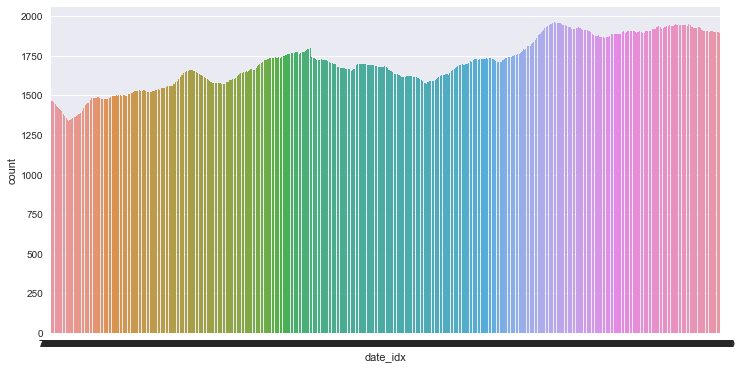

In [93]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x='date_idx', data=df)
plt.show()

## Find the top 5 best performance stocks by average ret1 and Plot their performances

In [108]:
temp_df = df.groupby('si')['ret1'].agg('mean').reset_index().sort_values(by='ret1')
temp_df.tail()

,si,ret1
2880,3203.0,0.012438
2469,2768.0,0.013619
2876,3199.0,0.016856
191,212.0,0.018283
949,1075.0,0.023323


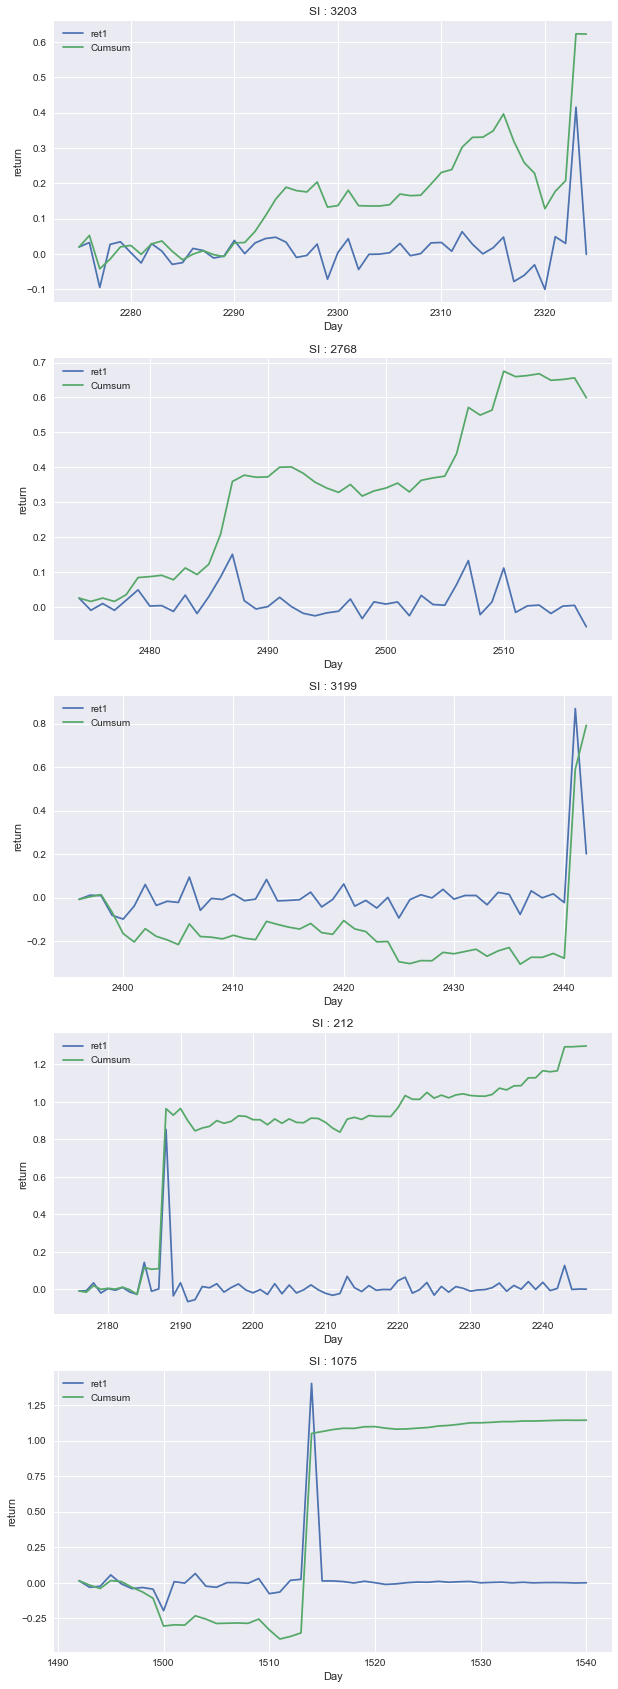

In [128]:
id_to_use = [3203, 2768, 3199, 212, 1075]
fig = plt.figure(figsize=(10, 30))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['si']==id_val,:]
    plt.plot(temp_df.date_idx.values, temp_df.ret1.values, label='ret1')
    plt.plot(temp_df.date_idx.values, temp_df.ret1.cumsum(), label='Cumsum')
    plt.legend(loc='upper left')
    plt.ylabel('return')
    plt.xlabel('Day')
    plt.title("SI : "+str(id_val))
plt.show()


## Find the top 5 worst performance stocks by average ret1 and Plot their performances

In [120]:
temp_df = df.groupby('si')['ret1'].agg('mean').reset_index().sort_values(by='ret1')
temp_df.head()

,si,ret1
1677,1904.0,-0.079165
2874,3197.0,-0.054285
2564,2869.0,-0.044538
690,782.0,-0.031913
1056,1194.0,-0.030945


In [124]:
id_to_use = temp_df.head().si.values
id_to_use

array([ 1904.,  3197.,  2869.,   782.,  1194.])

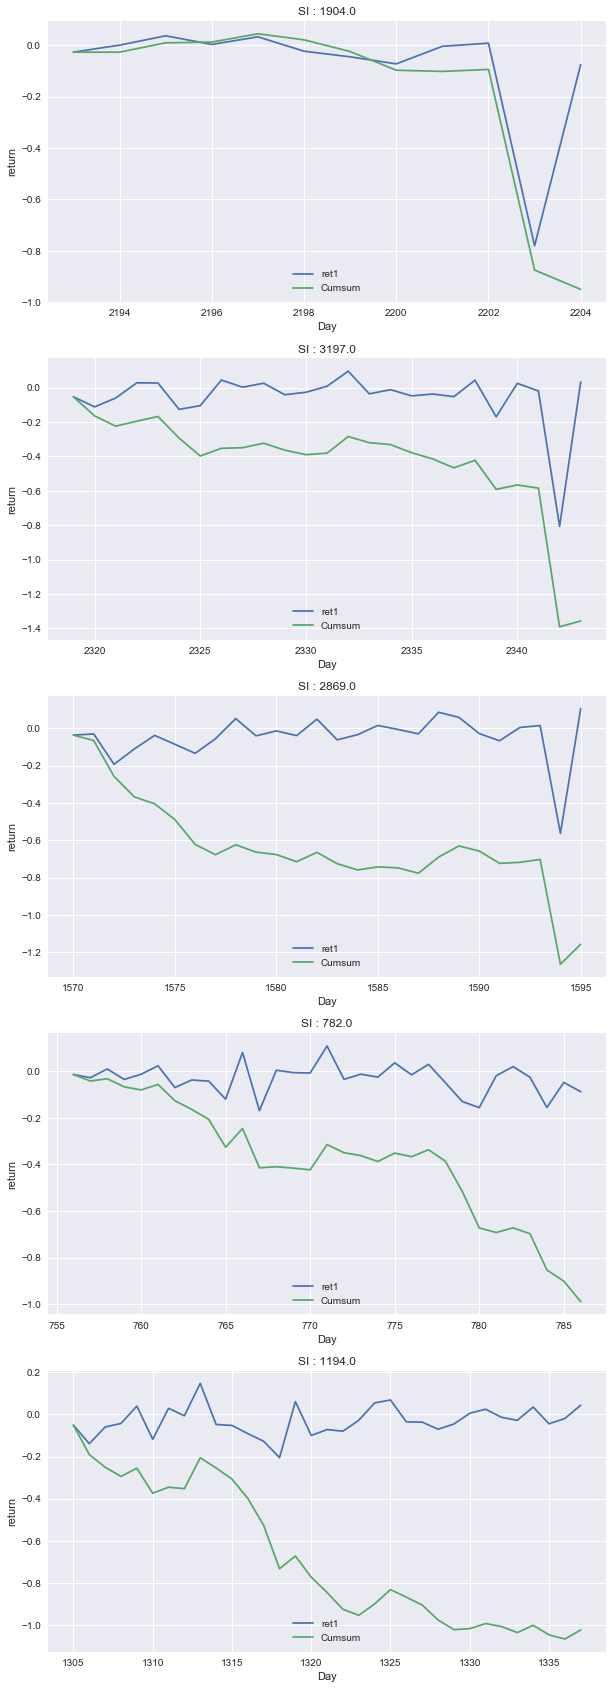

In [126]:
#id_to_use = [1904, 3197, 2869, 782, 1194]
fig = plt.figure(figsize=(10, 30))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['si']==id_val,:]
    plt.plot(temp_df.date_idx.values, temp_df.ret1.values, label='ret1')
    plt.plot(temp_df.date_idx.values, temp_df.ret1.cumsum(), label='Cumsum')
    plt.legend(loc='lower center')
    plt.ylabel('return')
    plt.xlabel('Day')
    plt.title("SI : "+str(id_val))
plt.show()

## Now let us take some assets which are present across all the timestamps and see their distribution.

In [136]:
temp_df = df.groupby('si')['ret1'].agg('count').reset_index().sort_values(by='ret1')
id_to_use = temp_df.tail().si.values
temp_df.tail()

,si,ret1
1417,1603.0,1762
1411,1596.0,1762
1407,1592.0,1762
1435,1625.0,1762
1074,1214.0,1762


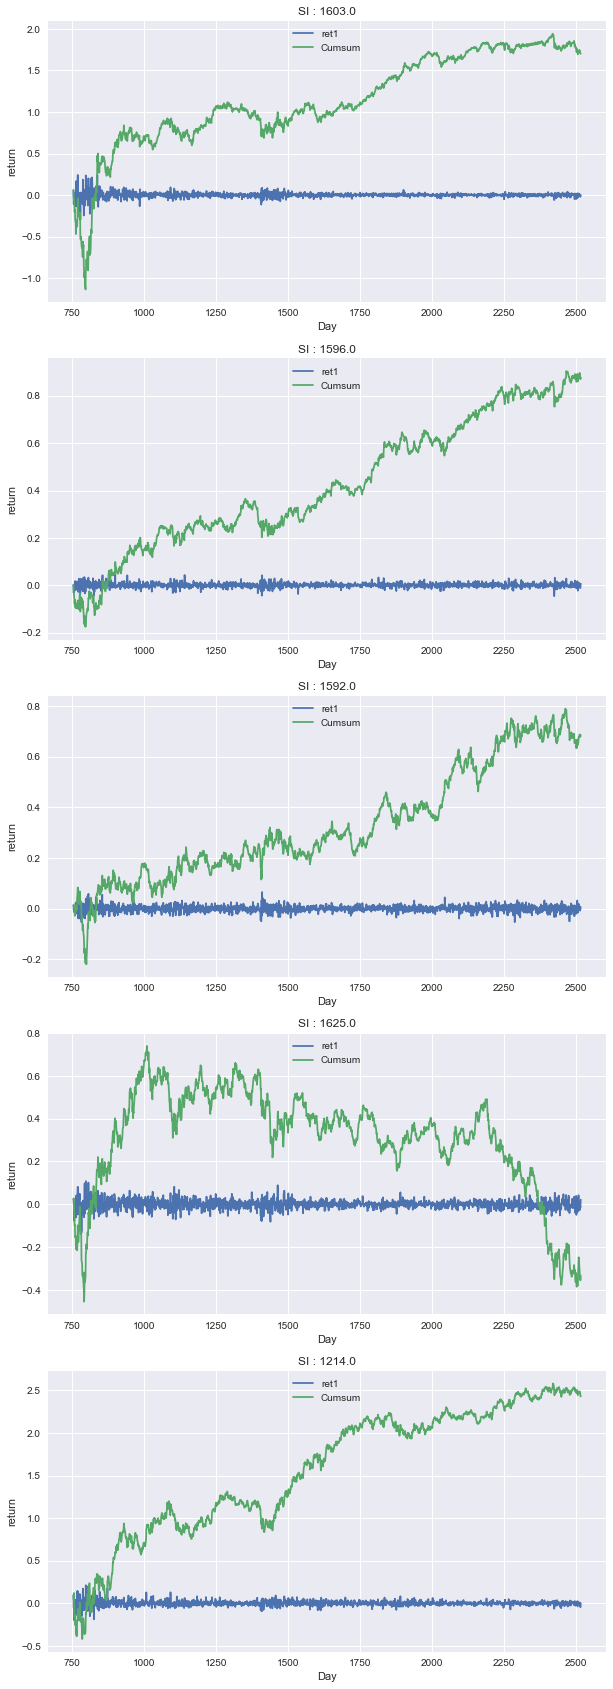

In [138]:
fig = plt.figure(figsize=(10, 30))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['si']==id_val,:]
    plt.plot(temp_df.date_idx.values, temp_df.ret1.values, label='ret1')
    plt.plot(temp_df.date_idx.values, temp_df.ret1.cumsum(), label='Cumsum')
    plt.legend(loc='upper center')
    plt.ylabel('return')
    plt.xlabel('Day')
    plt.title("SI : "+str(id_val))
plt.show()

# Now process data
 First, we should examine every column of the data cobe, delete the outliers, and normalized the data

In [95]:
df.head()

,si,date_idx,close,high,low,open,vwap,volume,spread_timeweighted_allday,mktcap,ret1_excess,volatility_15min_ret_allday,ret1
0,1.0,756.0,11.006562,11.047226,10.511810,10.572809,10.880027,3030120.0,NaN,NaN,-0.020402,0.454,0.079809
1,2.0,756.0,32.780014,33.674004,30.723312,30.751602,32.732647,10221556.0,NaN,NaN,-0.012551,0.772,0.021923
2,3.0,756.0,17.487085,17.584661,16.873035,17.460470,17.372072,782126.0,NaN,NaN,NaN,NaN,0.048351
3,4.0,756.0,33.283447,33.439529,32.240154,33.010765,33.115074,795895.0,NaN,NaN,-0.002315,0.489,0.001484
4,5.0,756.0,11.709191,11.746611,10.987931,11.080832,11.475926,188749408.0,NaN,NaN,0.030369,0.397,-0.016494


In [103]:
df.mean(axis=0)

si                             1.445190e+03
date_idx                       1.690843e+03
close                          3.232310e+02
high                           3.330381e+02
low                            3.150025e+02
open                           3.253507e+02
vwap                           3.236931e+02
volume                         2.706195e+06
spread_timeweighted_allday     2.095209e-01
mktcap                         1.483166e+04
ret1_excess                    5.212351e-05
volatility_15min_ret_allday    3.289632e-01
ret1                           5.566553e-04
dtype: float32

In [106]:
test_df = df.groupby('si').agg([np.mean, np.std, len]).reset_index()
test_df.head()

si     date_idx                          close                     \
               mean         std     len       mean        std     len   
0  1.0  1634.144775  508.432037  1755.0  28.888409   8.647479  1755.0   
1  2.0  1636.500000  508.789917  1762.0  33.285988   8.500720  1762.0   
2  3.0  1636.500000  508.789917  1762.0  25.454369   5.514018  1762.0   
3  4.0  1636.500000  508.789917  1762.0  86.553459  42.548809  1762.0   
4  5.0  1636.500000  508.789917  1762.0  62.710808  31.514950  1762.0   

        high                           low                          open  \
        mean        std     len       mean        std     len       mean   
0  29.188692   8.678279  1755.0  28.556070   8.625630  1755.0  28.871756   
1  33.771004   8.554531  1762.0  32.805969   8.423232  1762.0  33.324501   
2  25.774738   5.547390  1762.0  25.117006   5.485260  1762.0  25.450230   
3  87.431656  42.949139  1762.0  85.632874  42.165878  1762.0  86.520210   
4  63.321075  31.800102  1762.0  62.089561  31.249851  1762.0  62.742554   

                           vwap                           volume  \
         std     len       mean        std     len          mean   
0   8.658295  1755.0  28.881350   8.649008  1755.0  3.226521e+06   
1   8.503081  1762.0  33.260464   8.488863  1762.0  8.753194e+06   
2   5.518227  1762.0  25.451288   5.518728  1762.0  7.487596e+05   
3  42.572712  1762.0  86.507324  42.574802  1762.0  1.160902e+06   
4  31.551239  1762.0  62.724781  31.526934  1762.0  1.088812e+08   

                        spread_timeweighted_allday                    \
            std     len                       mean       std     len   
0  1.674509e+06  1755.0                   0.009900  0.002190  1755.0   
1  4.953536e+06  1762.0                   0.028936  0.000492  1762.0   
2  7.130405e+05  1762.0                   0.023712  0.008648  1762.0   
3  8.964086e+05  1762.0                   0.068582  0.047419  1762.0   
4  6.042479e+07  1762.0                   0.012118  0.004140  1762.0   

          mktcap                        ret1_excess                    \
            mean            std     len        mean       std     len   
0   15063.454102    2368.826172  1755.0    0.000274  0.012740  1755.0   
1   12431.166992    3695.023926  1762.0    0.000090  0.016348  1762.0   
2    2167.248291     245.415329  1762.0   -0.000387  0.016868  1762.0   
3    8096.796387    2774.892334  1762.0    0.000614  0.016729  1762.0   
4  542358.687500  112667.718750  1762.0    0.001565  0.017178  1762.0   

  volatility_15min_ret_allday                        ret1                    
                         mean       std     len      mean       std     len  
0                    0.263656  0.103194  1755.0  0.000917  0.020416  1755.0  
1                    0.326238  0.136780  1762.0  0.000257  0.026208  1762.0  
2                    0.293719  0.077613  1762.0  0.000381  0.020978  1762.0  
3                    0.249165  0.076445  1762.0  0.001029  0.018085  1762.0  
4                    0.227093  0.075295  1762.0  0.001345  0.017462  1762.0